In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01 #i/p to hidden layer
        self.b1 = np.zeros((1,hidden_size)) #Hidden layer bias
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01 #Hidden to o/p
        self.b2 = np.zeros((1, output_size)) #Output layer bias
        
    #sigmoid we use for hidden layer to introduce non-linearlity
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    #we use softmax for output layer to convert logits to probabilities

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True)) #Numerical Stability
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1 #i/p   #z1 = X * W1 + b1
        self.a1 = self.sigmoid(self.z1) #a1 = sigmoid(z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2 #hidden to o/p   z2 = a1 * W2 + b2
        self.a2 = self.softmax(self.z2) #a2 = softmax(z2)
        return self.a2

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-8)) /  m #cross-entropy loss: Measure the difference between  predicted probability
        return loss

    def backward(self, X, y_true, y_pred, learning_rate):
        m = y_true.shape[0]

        #Output layer gradient
        dz2 = y_pred - y_true
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) /m

        #Hidden layer gradient
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        #updating the parameters
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs=1000, learning_rate=0.1):
        losses = []
        for epoch in range(epochs):
            y_pred  = self.forward(X) #Forward pass
            loss = self.compute_loss(y, y_pred)
            losses.append(loss)


            #Backward pass
            self.backward(X, y, y_pred, learning_rate)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

        plt.plot(losses)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training Loss")
        plt.show()

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)
    

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]]) #i/p sample 4 samples 2 features)

y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

Epoch 0, Loss: 0.6931516218394687
Epoch 100, Loss: 0.6931471604330512
Epoch 200, Loss: 0.6931471604325279
Epoch 300, Loss: 0.6931471604320076
Epoch 400, Loss: 0.6931471604314872
Epoch 500, Loss: 0.6931471604309667
Epoch 600, Loss: 0.6931471604304461
Epoch 700, Loss: 0.6931471604299253
Epoch 800, Loss: 0.6931471604294046
Epoch 900, Loss: 0.6931471604288838


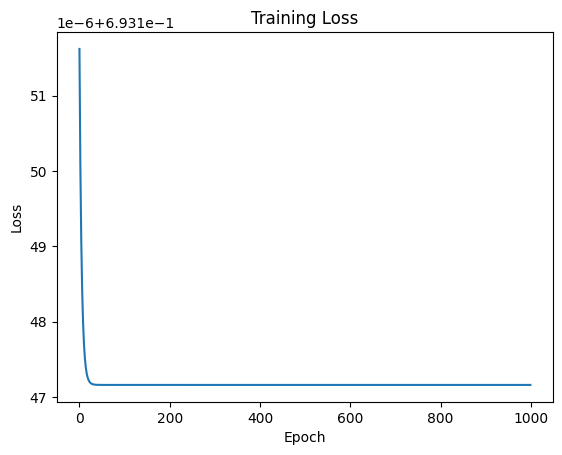

predictions: [0 0 1 1]


In [4]:
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=2) #n/w
nn.train(X, y, epochs=1000, learning_rate=0.1)#train

#Predict
predictions = nn.predict(X)
print("predictions:", predictions)
